<a href="https://colab.research.google.com/github/vanditanandal/EDA/blob/main/netflix_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Loading the dataset

In [ ]:
netflix_movies=pd.read_csv("/content/drive/MyDrive/netflix_data.csv")

In [ ]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [ ]:
netflix_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

### Understanding the columns

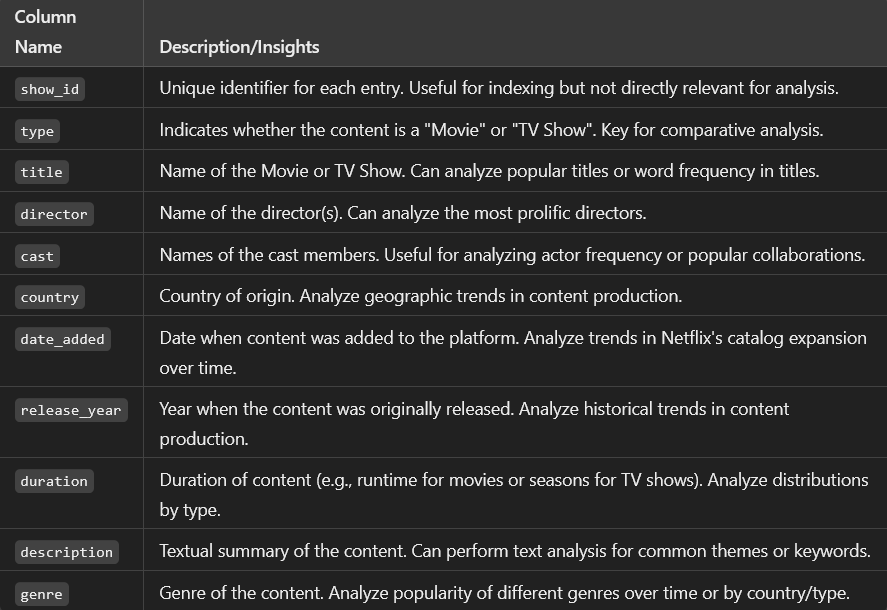

### Handling null values

In [ ]:
netflix_movies.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
duration,0
description,0


In [ ]:
netflix_movies['director'] = netflix_movies['director'].fillna('Unknown')
netflix_movies['cast'] = netflix_movies['cast'].fillna('Unknown')

In [ ]:
netflix_movies['country'].value_counts()

,count
country,
United States,2883
India,956
United Kingdom,577
Canada,259
Japan,237
...,...
Zimbabwe,1
Namibia,1
Soviet Union,1


In [ ]:
netflix_movies['country']=netflix_movies['country'].fillna(netflix_movies['country'].mode()[0])

In [ ]:
netflix_movies.dropna(subset=['date_added'],inplace=True)

In [ ]:
netflix_movies.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
duration,0
description,0


### Understanding the dataset

In [ ]:
netflix_movies.shape

(7777, 11)

In [ ]:
show=['s7747','s7748','s7749','s7774','s7701','s7690','s7691','s7692']
netflix_movies[netflix_movies['show_id'].isin(show)]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7689,s7690,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,101,"In this action-packed follow-up to XXX, U.S. i...",Action
7690,s7691,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,"June 1, 2017",2001,106,When rich teens Tenoch and Julio meet the allu...,Dramas
7691,s7692,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,"March 1, 2018",2008,137,"The lives of a middle-aged soap opera addict, ...",Dramas
7700,s7701,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...",Egypt,"October 22, 2019",2018,97,A man cured of leprosy and a young orphan leav...,Dramas
7746,s7747,TV Show,دفعة القاهرة,Unknown,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",United States,"April 25, 2020",2019,1,A group of women leaves Kuwait to attend unive...,International TV
7747,s7748,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...",Egypt,"October 11, 2018",2016,98,Amid the tumult following Egyptian President M...,Dramas
7748,s7749,Movie,الف مبروك,Ahmed Nader Galal,"Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,"April 25, 2020",2009,115,"On his wedding day, an arrogant, greedy accoun...",Comedies
7773,s7774,Movie,Zoé: Panoramas,"Rodrigo Guardiola, Gabriel Cruz Rivas","Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...",Mexico,"November 1, 2019",2016,89,This introspective rockumentary follows the ca...,Documentaries


In [ ]:
netflix_movies.describe()

,release_year,duration
count,7777.000000,7777.000000
mean,2013.935965,69.204706
std,8.760694,50.931983
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [ ]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   duration      7777 non-null   int64 
 9   description   7777 non-null   object
 10  genre         7777 non-null   object
dtypes: int64(2), object(9)
memory usage: 729.1+ KB


In [ ]:
netflix_movies.nunique()

,0
show_id,7777
type,2
title,7777
director,4050
cast,6822
country,81
date_added,1565
release_year,73
duration,206
description,7759


In [ ]:
netflix_movies.duplicated().sum()

0

### Univariate Analysis

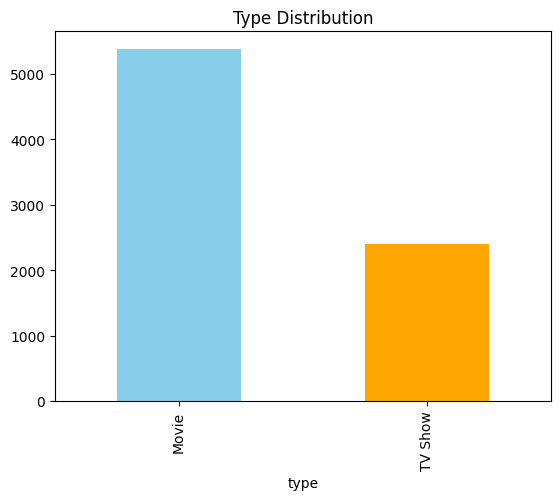

In [ ]:
netflix_movies['type'].value_counts().plot(kind='bar',color=['skyblue','orange'],title='Type Distribution')
plt.show()

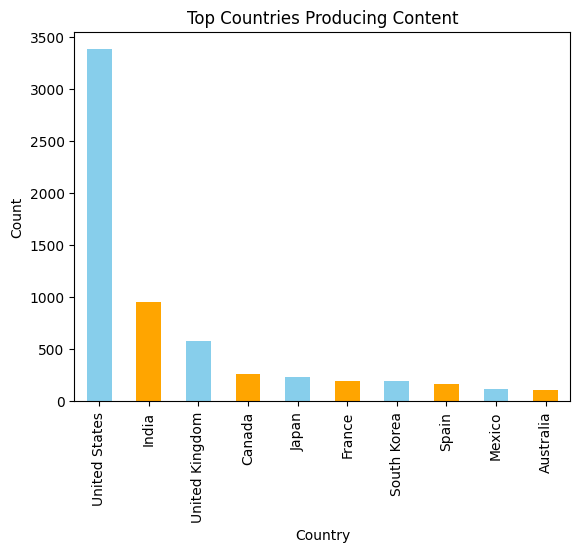

In [ ]:
netflix_movies['country'].value_counts().head(10).plot.bar(color=['skyblue','orange'])
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top Countries Producing Content')
plt.show()

In [ ]:
netflix_movies['genre'].value_counts()

,count
genre,
Dramas,1384
Comedies,1074
Documentaries,751
Action,721
International TV,689
Children,502
Crime TV,369
Kids,357
Stand-Up,354


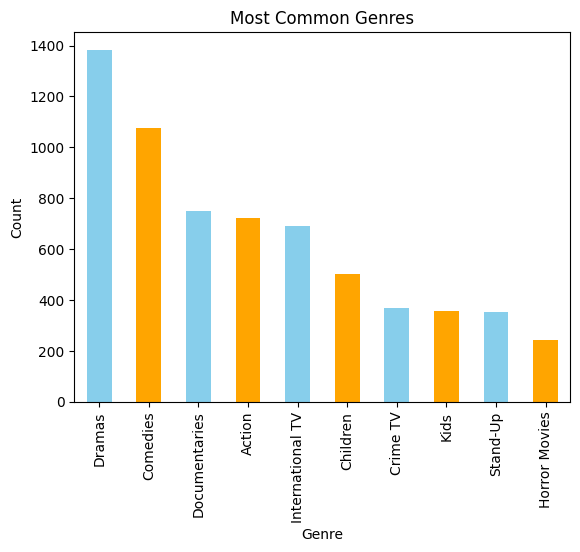

In [ ]:
netflix_movies['genre'].value_counts().head(10).plot.bar(color=['skyblue','orange'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Common Genres')
plt.show()

### Bivariate Analysis

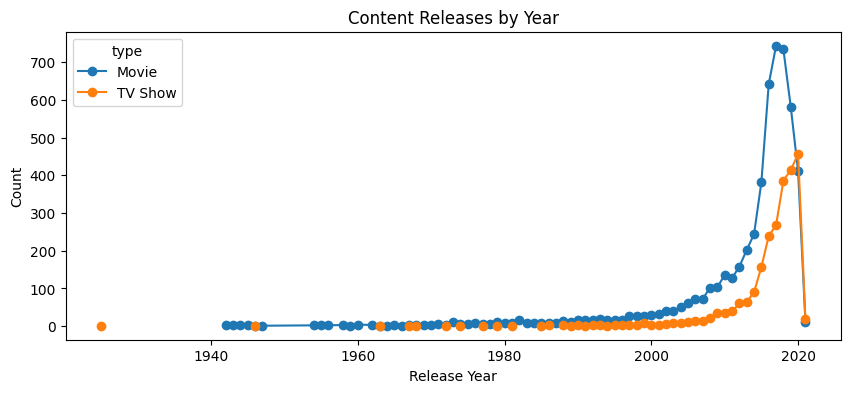

In [ ]:
netflix_movies.groupby(['release_year', 'type']).size().unstack().plot(marker='o', figsize=(10, 4), title='Content Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


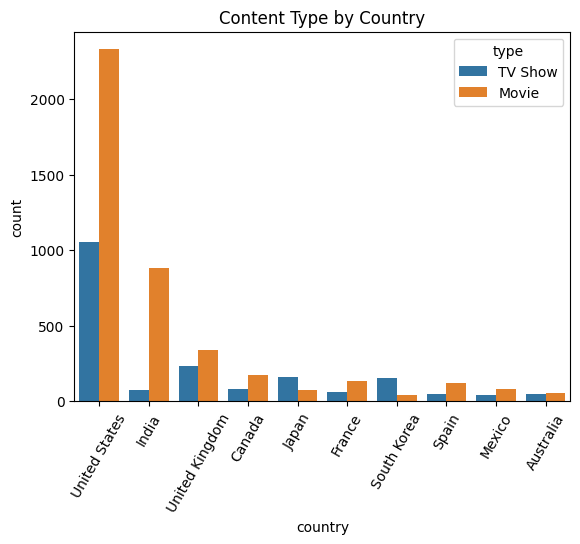

In [ ]:
sns.countplot(data=netflix_movies, x='country', hue='type', order=netflix_movies['country'].value_counts().head(10).index)
plt.title('Content Type by Country')
plt.xticks(rotation=60)
plt.show()


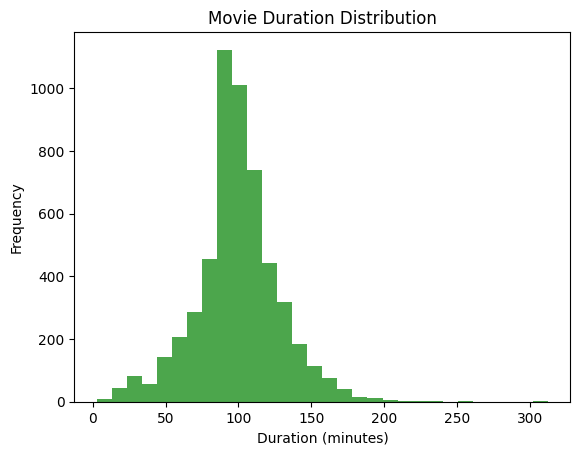

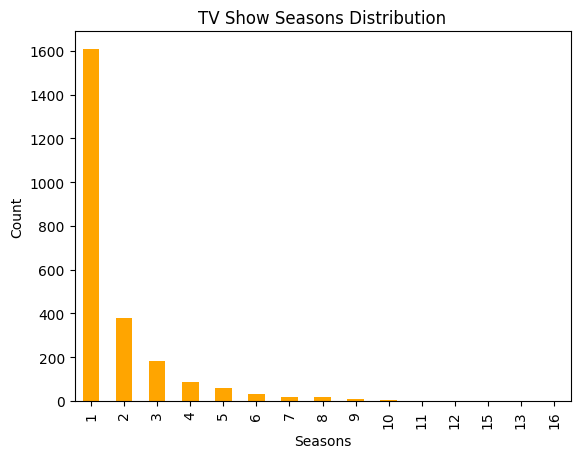

In [ ]:
netflix_movies[netflix_movies['type'] == 'Movie']['duration'].plot(kind='hist', bins=30, color='green', alpha=0.7, title='Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

netflix_movies[netflix_movies['type'] == 'TV Show']['duration'].value_counts().plot(kind='bar', color='orange', title='TV Show Seasons Distribution')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


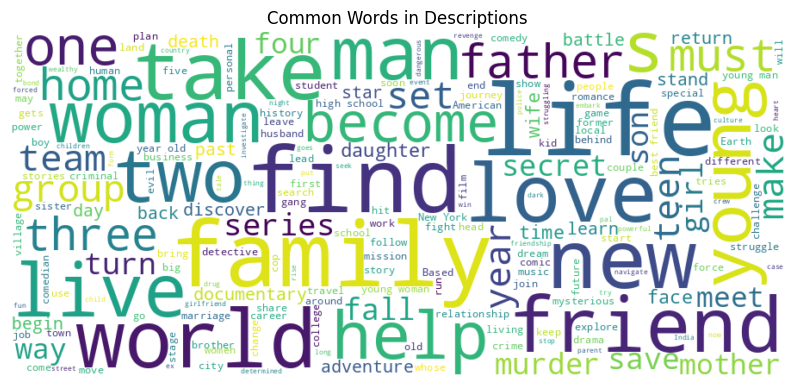

In [ ]:
text = ' '.join(netflix_movies['description'].dropna())
wordcloud = WordCloud(width=900, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Descriptions')
plt.show()

### Time Series Analysis

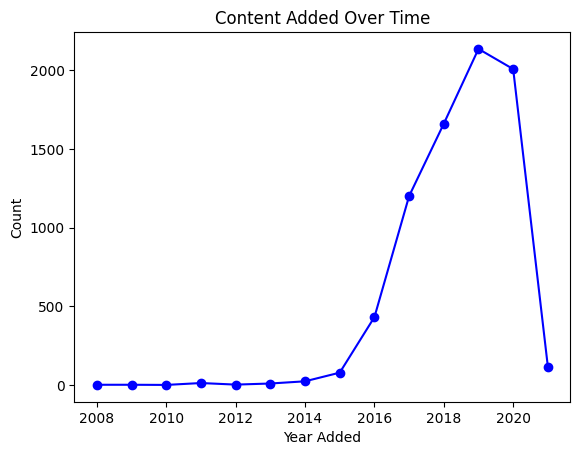

In [ ]:
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'], format='%B %d, %Y', errors='coerce')
netflix_movies['year_added'] = netflix_movies['date_added'].dt.year
content_added = netflix_movies['year_added'].value_counts().sort_index()
content_added.plot(kind='line', marker='o', title='Content Added Over Time', color='blue')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

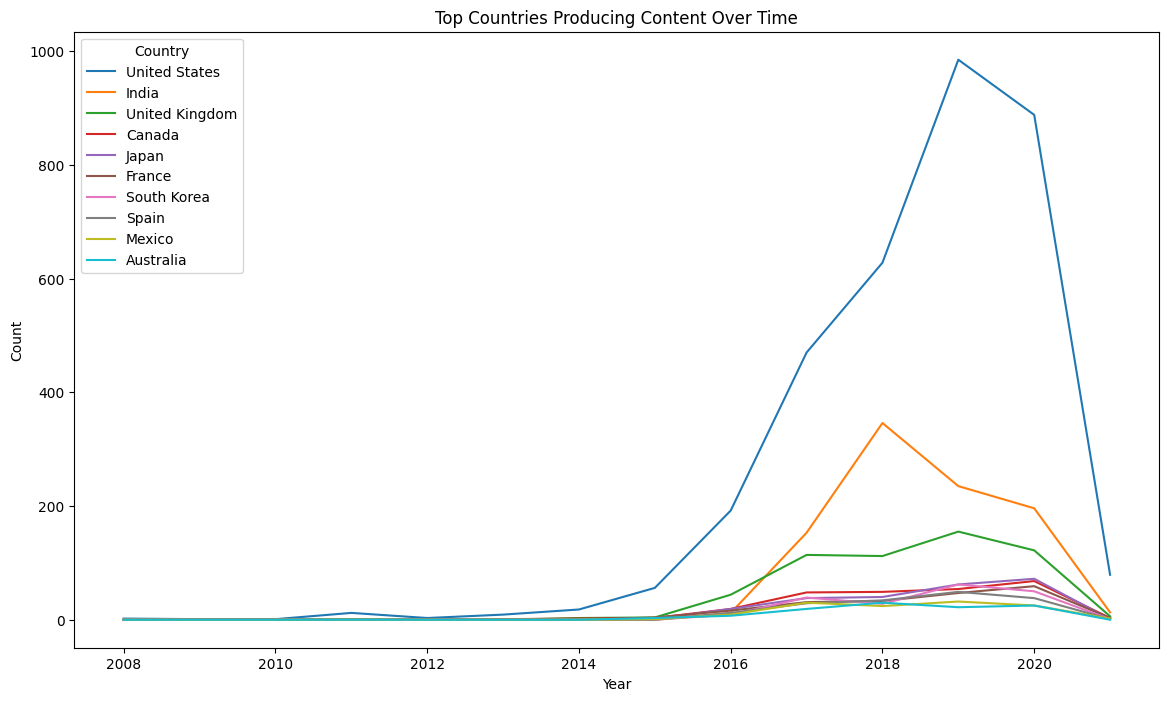

In [ ]:
top_countries = netflix_movies['country'].value_counts().head(10)

country_trend = netflix_movies.groupby([netflix_movies['date_added'].dt.year, 'country']).size().unstack().fillna(0)
country_trend[top_countries.index].plot(figsize=(14, 8), title='Top Countries Producing Content Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Country')
plt.show()


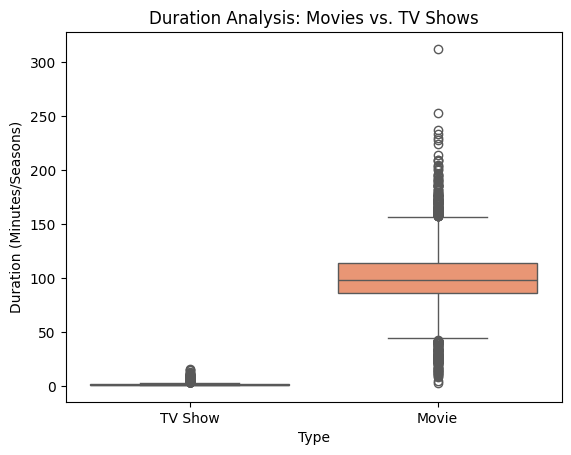

In [ ]:

netflix_movies['duration'] = netflix_movies['duration'].astype(str)
netflix_movies['duration_numeric'] = netflix_movies['duration'].str.extract('(\d+)').astype(float)
sns.boxplot(data=netflix_movies, x='type',hue='type', y='duration_numeric', palette='Set2',legend=False)
plt.title('Duration Analysis: Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Duration (Minutes/Seasons)')
plt.show()

### Forecasting Future Content Additions

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiug8zy7p/j4uk6rso.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiug8zy7p/but7bnoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1548', 'data', 'file=/tmp/tmpiug8zy7p/j4uk6rso.json', 'init=/tmp/tmpiug8zy7p/but7bnoc.json', 'output', 'file=/tmp/tmpiug8zy7p/prophet_model1wvg3j20/prophet_model-20241208164938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


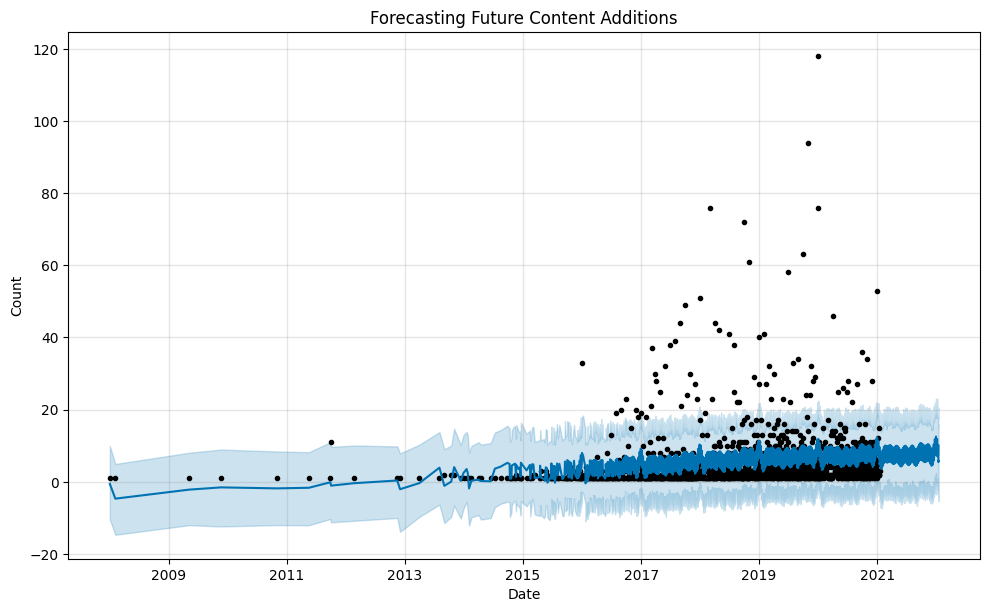

In [ ]:
from prophet import Prophet
time_series_data = netflix_movies['date_added'].value_counts().rename_axis('date').reset_index(name='count')
time_series_data['date'] = pd.to_datetime(time_series_data['date'])

prophet_data = time_series_data.rename(columns={'date': 'ds', 'count': 'y'})
model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

model.plot(forecast)
plt.title('Forecasting Future Content Additions')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


The black dots represent the actual number of content additions to Netflix on specific dates in the past.

The blue line shows the predicted number of content additions over time, as projected by the model.

The light blue shaded region represents the uncertainty intervals:

    Inner band (darker blue): 80% confidence interval.
    Outer band (lighter blue): 95% confidence interval.

### Observation:
There's an increasing trend in content additions, especially after 2017, where the number of additions spikes significantly.

The trend captures the overall growth in content additions, but it smoothens out short-term variations.

The model predicts a wider range of possible values as we look further into the future, indicating increasing uncertainty.